# Fortnite Tweets Sentiment Analysis

The goal of this notebook is to scrape the tweets containing the keyword 'fortnite' for Fortnite Season 10 (9th Aug 2019 - 10th Oct 2019). After that sentiment for each tweet is assigned. The tweets are then plotted in Tableau and compared to the release of each update for Fortnite Season 10. Since the addition of B.R.U.T.E was controversial, the sentiment for period before and after brute is also analysed along with sentiment for each update. The final Tableau Viz can be viewed here: https://public.tableau.com/profile/harshul.varma#!/vizhome/FortniteSentimentAnalysis/FNTweetsDashboard

In [1]:
#Loading libraries
import pandas as pd
import datetime as dt
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'}


In [2]:
#assinging time period for Fortnite Season 10 tweets to be scraped
season10_begindate = dt.date(2019,8,1)
season10_enddate = dt.date(2019,10,10)
lang = 'english'

In [3]:
#Scraping the tweets
tweets = query_tweets('fortnite',begindate=season10_begindate,enddate=season10_enddate,lang=lang)

INFO: queries: ['fortnite since:2019-08-01 until:2019-08-04', 'fortnite since:2019-08-04 until:2019-08-08', 'fortnite since:2019-08-08 until:2019-08-11', 'fortnite since:2019-08-11 until:2019-08-15', 'fortnite since:2019-08-15 until:2019-08-18', 'fortnite since:2019-08-18 until:2019-08-22', 'fortnite since:2019-08-22 until:2019-08-25', 'fortnite since:2019-08-25 until:2019-08-29', 'fortnite since:2019-08-29 until:2019-09-01', 'fortnite since:2019-09-01 until:2019-09-05', 'fortnite since:2019-09-05 until:2019-09-08', 'fortnite since:2019-09-08 until:2019-09-12', 'fortnite since:2019-09-12 until:2019-09-15', 'fortnite since:2019-09-15 until:2019-09-19', 'fortnite since:2019-09-19 until:2019-09-22', 'fortnite since:2019-09-22 until:2019-09-26', 'fortnite since:2019-09-26 until:2019-09-29', 'fortnite since:2019-09-29 until:2019-10-03', 'fortnite since:2019-10-03 until:2019-10-06', 'fortnite since:2019-10-06 until:2019-10-10']
INFO: Got 115491 tweets (115491 new).
INFO: Got 239394 tweets (1

In [4]:
#Putting the data in a dataframe and dropping the duplicates to remove spam tweets
df_all = pd.DataFrame(t.__dict__ for t in tweets)
df_all.drop_duplicates(subset = 'text',inplace = True)
print(len(df_all))

3391021


In [5]:
#Analyzing sentiment for each tweet and assigning a polarity score
analyzer = SentimentIntensityAnalyzer()
sentiments = df_all['text'].apply(lambda x: analyzer.polarity_scores(x))

In [12]:
df_all = pd.concat([df_all, sentiments.apply(pd.Series)],1)

In [13]:
#Saving locally
df_all.to_csv('D:/Downloads/FNalltweets.csv')

In [14]:
df_all.head()

,fullname,html,is_retweet,likes,replies,retweet_id,retweeter_userid,retweeter_username,retweets,text,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,neg,neu,pos,compound
0,Purple People Eater,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,,,,0,I can't get into Fortnite tho,2019-10-05 23:59:51,1570319991,1180633731381497857,/AyyeYoZay/status/1180633731381497857,122188126,AyyeYoZay,0.000,1.000,0.000,0.0000
1,Berna,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,1,1,,,,0,i want fps fixed.,2019-10-05 23:59:46,1570319986,1180633711236325380,/SSpookstarr/status/1180633711236325380,992440008555597827,SSpookstarr,0.000,0.606,0.394,0.0772
2,Just.ironice,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,,,,0,Check out my broadcast from my PlayStation 4! ...,2019-10-05 23:59:46,1570319986,1180633709990559744,/IroniceJust/status/1180633709990559744,1159702441803300864,IroniceJust,0.000,1.000,0.000,0.0000
3,Proxuhs,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,1,,,,0,@FortniteGame pls magnus pls,2019-10-05 23:59:43,1570319983,1180633696757583873,/Proxuhss/status/1180633696757583873,1084927530753236993,Proxuhss,0.000,0.435,0.565,0.1531
4,Purple People Eater,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,,,,0,Ayye oneshotgurl and chicalive are nasty on th...,2019-10-05 23:59:38,1570319978,1180633677690281984,/AyyeYoZay/status/1180633677690281984,122188126,AyyeYoZay,0.286,0.714,0.000,-0.5574


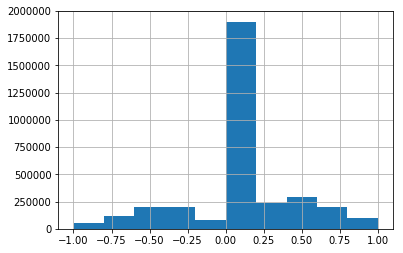

In [16]:
#Plotting Histogram
df_all['compound'].hist()

Looking at the histogram we can see that most of the tweets are neutral, ie have a 0 polarity score. Since I want to capture the polarity in the community, I will remove all the 0 polarity score tweets. Moreover the sentiments score analysis is not yet perfect and cannot sense negativity perfectly at times such as when sarcasm is used in a tweet and often shows it as neutral.

In [17]:
#removing tweets with 0 polarity score
df_all_withoutzeros = df_all[df_all['compound']!=0]

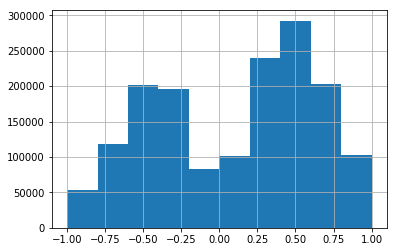

In [18]:
#plotting histogram for tweets without neutral tweets
df_all_withoutzeros['compound'].hist()

We can see the disparity between the positive and negative sentiments from the tweets much better now.  

I will also create two dataframes to analyse sentiments for each update and after/before brute nerf

In [19]:
#converting timestamp to necessary format
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
df_all["timestamp"] = df_all["timestamp"].astype("datetime64")

In [20]:
#Creating bins for timeperiod for each update
bins = ['2019-08-01 04:00:00','2019-08-06 04:00:00','2019-08-14 04:00:00','2019-08-20 04:00:00','2019-08-27 04:00:00',
        '2019-09-03 04:00:00','2019-09-11 04:00:00','2019-09-18 04:00:00','2019-09-25 04:00:00','2019-10-02 04:00:00',
       '2019-10-10 04:00:00']

bins = pd.to_datetime(pd.Series(bins))

In [22]:
#applying the time period bins to the dataframe and finding mean sentiment for each update 
groups = df_all.groupby(pd.cut(df_all.timestamp, bins)).agg('mean').reset_index()
groups = groups[['timestamp','compound']]

In [23]:
#creating column to name updates
updates = ['10.0 Update','10.0 Content Update','10.1 Update','10.1 Content Update','10.20 Update',
           '10.20 Content Update','10.30 Update','10.31 Update','10.4 Update','10.40.1 Update']

groups['Updates'] = updates

In [24]:
#saving update analysis
groups.to_csv('D:/Downloads/UpdateCompounds.csv')

In [25]:
#creating bins timeperiod for before/after brute nerf
brute_bins = ['2019-08-01 04:00:00 ','2019-08-22 04:00:00','2019-10-06 04:00:00']

brute_bins = pd.to_datetime(pd.Series(brute_bins))

In [26]:
#applying the bins to the dataframe and finding mean sentiment for each update
brute_sentiments = df_all.groupby(pd.cut(df_all.timestamp, brute_bins)).agg('mean').reset_index()
brute_sentiments = brute_sentiments[['timestamp','compound']]
brute_sentiments['Timeline'] = ['Before Brute Nerf','After Brute Nerf']

In [27]:
#saving the brute analysis
brute_sentiments.to_csv('D:/Downloads/BruteSentiments.csv')

The Final Tableau Viz can be found here: https://public.tableau.com/profile/harshul.varma#!/vizhome/FortniteSentimentAnalysis/FNTweetsDashboard
<br>A screenshot of the analysis is embedded below.
<br> ![]("Images/FN.png")